# 0.) Import the US Perminent Visas using zip extractor

In [1]:
import pandas as pd
from google.colab import drive

import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
#import zipfile

#zf = zipfile.ZipFile("/content/gdrive/MyDrive/Econ 441B/us_perm_visas.csv.zip")
#df = pd.read_csv(zf.open('us_perm_visas.csv'))

In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ 441B/us_perm_visas.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


# 1.) US perm Visas csv from cycle using zip extractor


In [6]:
#import zipfile

#zf = zipfile.ZipFile("/content/gdrive/MyDrive/Econ 441B/us_perm_visas.csv.zip")
#df = pd.read_csv(zf.open('us_perm_visas.csv'))

# 2.) Choose 4 features you think are important. Case_status is your target variable


In [7]:
#df_select = df[['class_of_admission', 'case']]

In [8]:
df_select = df[["job_info_work_state", "ji_offered_to_sec_j_foreign_worker", "job_info_education", "ri_layoff_in_past_six_months"]]

In [9]:
#x = pd.get_dummies(df_select, "class_of_admission")

# 3.) Clean your data for a decision tree


In [11]:
#x = pd.get_dummies(df_select, "job_info_work_postal_code")
#y = df_select("case_status")

In [10]:
dummies = pd.get_dummies(df_select[["job_info_work_state", "ji_offered_to_sec_j_foreign_worker", "job_info_education", "ri_layoff_in_past_six_months"]])
                       
X = dummies
y = df["case_status"]

In [ ]:
X

# 4.) Fit and plot a decision tree of depth 3


In [12]:
from sklearn import tree

[Text(0.5, 0.875, 'job_info_education_None <= 0.5\ngini = 0.599\nsamples = 374362\nvalue = [181933, 148586, 25649, 18194]'),
 Text(0.25, 0.625, 'ri_layoff_in_past_six_months_N <= 0.5\ngini = 0.593\nsamples = 351595\nvalue = [171290, 142185, 21903, 16217]'),
 Text(0.125, 0.375, 'job_info_work_state_WASHINGTON <= 0.5\ngini = 0.627\nsamples = 144229\nvalue = [65136, 57226, 13120, 8747]'),
 Text(0.0625, 0.125, 'gini = 0.628\nsamples = 137656\nvalue = [62649, 53654, 12951, 8402]'),
 Text(0.1875, 0.125, 'gini = 0.558\nsamples = 6573\nvalue = [2487, 3572, 169, 345]'),
 Text(0.375, 0.375, 'ji_offered_to_sec_j_foreign_worker_Y <= 0.5\ngini = 0.567\nsamples = 207366\nvalue = [106154, 84959, 8783, 7470]'),
 Text(0.3125, 0.125, 'gini = 0.547\nsamples = 128393\nvalue = [71216, 48639, 4691, 3847]'),
 Text(0.4375, 0.125, 'gini = 0.588\nsamples = 78973\nvalue = [34938, 36320, 4092, 3623]'),
 Text(0.75, 0.625, 'ji_offered_to_sec_j_foreign_worker_Y <= 0.5\ngini = 0.668\nsamples = 22767\nvalue = [10643, 

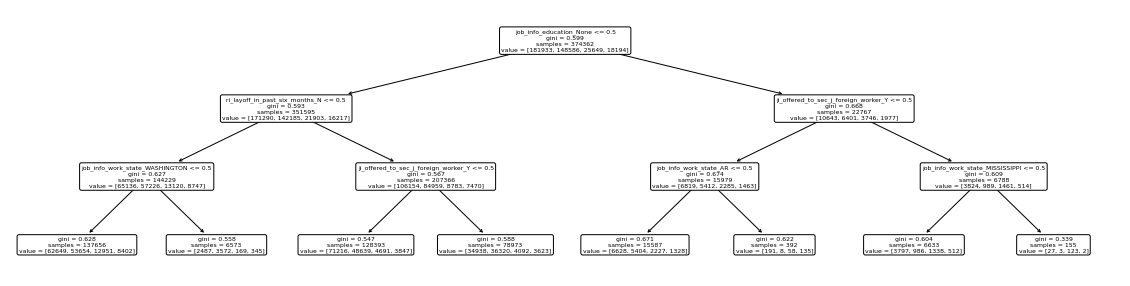

In [13]:
# Fit decision tree with depth 3

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X, y)



# Plot the decision tree
plt.figure(figsize=(20, 5))
tree.plot_tree(clf, max_depth=3, rounded = True, feature_names = X.columns)

# 5.) Write your interpretation of the largest (by sample size) leaf node


In [14]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

leaf_node_indices = []
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()

In [15]:
node_counts = clf.tree_.n_node_samples
leaf_node_sizes = [node_counts[i] for i in leaf_node_indices]

# Find the largest leaf node
#largest_leaf_node_index = np.argmax(leaf_node_sizes)
n_nodes

15

In [16]:
children_left

array([ 1,  2,  3, -1, -1,  6, -1, -1,  9, 10, -1, -1, 13, -1, -1],
      dtype=int64)

In [17]:
children_right

array([ 8,  5,  4, -1, -1,  7, -1, -1, 12, 11, -1, -1, 14, -1, -1],
      dtype=int64)

In [18]:
## the largest leaf node (by sample size) is the TOP leaf

#this is job_info_education for me

##The largest leaf node in my decision tree represents the one that contains the most samples.
##This node is valuable because it provides info on the distribution of samples in my data; along with the relationship between the predictors and the cast_study (target variable)

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
outputs = []

max_depths = [1,2,3]


for md in max_depths:
  clf = tree.DecisionTreeClassifier(max_depth = md)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  outputs.append(accuracy)

In [21]:
print(outputs)

[0.4875748745345637, 0.4875748745345637, 0.49362959365387726]


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the range of max_depth values to consider
max_depth_range = np.arange(1, 20)

# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Use GridSearchCV to find the best max_depth value
grid = GridSearchCV(dt, param_grid={'max_depth': max_depth_range}, cv=5)
grid.fit(X_train, y_train)

# Get the best max_depth value
best_max_depth = grid.best_params_['max_depth']

# Train the final model using the best max_depth value
dt_final = DecisionTreeClassifier(max_depth=best_max_depth)
dt_final.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=19)

In [ ]:
## The best MAX DEPTH for my out-of-sample accuracy is max_depth = 19